In [29]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

Keys in the file: ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<KeysViewHDF5 ['__param__qubit', 'beta_index', 'cal_count', 'cal_fit_signal', 'cal_freq', 'cal_pos', 'pmt_counts', 'pmt_counts_avg_thresholded', 'pos']>
<KeysViewHDF5 ['__param__qubit_tracker']>
b'{"devarg_override": {}, "log_level": 30, "file": "VdP_Two_Ion/A6_VdP1_Wigner.py", "class_name": "A6_VdP1mode_Wigner_AWG_Cam", "arguments": {"DopplerCool_frequency_397_cooling": 207527272.72727272, "DopplerCool_frequency_866_cooling": 89090909.0909091, "DopplerCool_frequency_397_far_detuned": 220000000.0, "DopplerCool_attenuation_866": 13.0, "DopplerCool_attenuation_397_far_detuned": 18.0, "DopplerCool_doppler_cooling_cooling_time": 0.003, "DopplerCool_attenuation_397": 22.0, "SideBandCool2Mode_sideband2mode_att_729_dp": 13.0, "SideBandCool2Mode_sideband2mode_freq_729_sp": 82000000.0, "SideBandCool2Mode_sideband2mode_att_729_sp": 13.0, "SideBandCool2Mode_sideband2mode_vib_freq1": 526600.0, "Sid

Text(0, 0.5, '<z>')

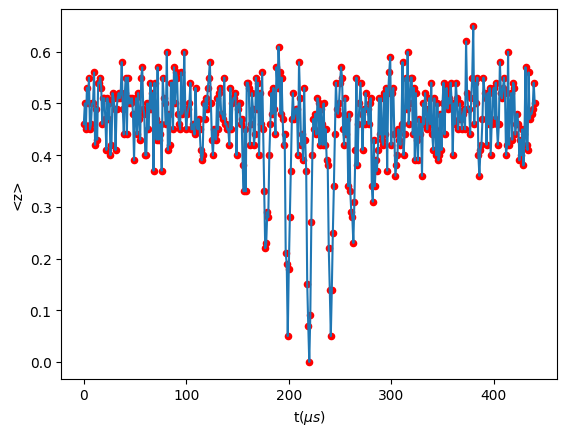

In [30]:
# Path to your .h5 file
file_path = '../results/2025-03-31/18/000066441-A6_VdP1mode_Wigner_AWG_Cam.h5'
#000044695-A6_VdP1mode_Wigner_AWG_Cam.h5'
#000043982-A6_Displacement_Wigner_AWG_Cam.h5'
#27408-A2_Displace_Wigner_2D.h5'
#4_Vdp_Wigner_2D.h5'
#-A2_Displace_Wigner_2D.h5'
#-A4_Vdp_Wigner_2D.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    print(file['archive'].keys())
    #print(file['archive']['__param__SDF'].keys())

    print(file['expid'][()])


    rabi_t= data['beta_index'][:]
    pmt_count=data['pmt_counts_avg_thresholded'][:]

plt.figure()
plt.plot(rabi_t, pmt_count)
plt.scatter(rabi_t, pmt_count,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')





In [31]:
pmt_count=pmt_count.reshape(int(np.sqrt(len(pmt_count))),int(np.sqrt(len(pmt_count))))
#pmt_count[pmt_count<0.0001]=np.nan
# pmt_count[pmt_count>0.595]=np.nan

In [32]:
eta1=0.0944#0.134
#0.0944#0.0944
eta2=0.0944#0.134#0.134
#0.0717
Rabi_readout1=0.044*2*np.pi
Rabi_readout2=0.044*2*np.pi
beta_time_range_us1 = 40
beta_time_range_us2 = 40

beta_range1=eta1*Rabi_readout1*beta_time_range_us1
beta_range2=eta2*Rabi_readout2*beta_time_range_us2
print(beta_range1, beta_range2)

1.043913539676045 1.043913539676045


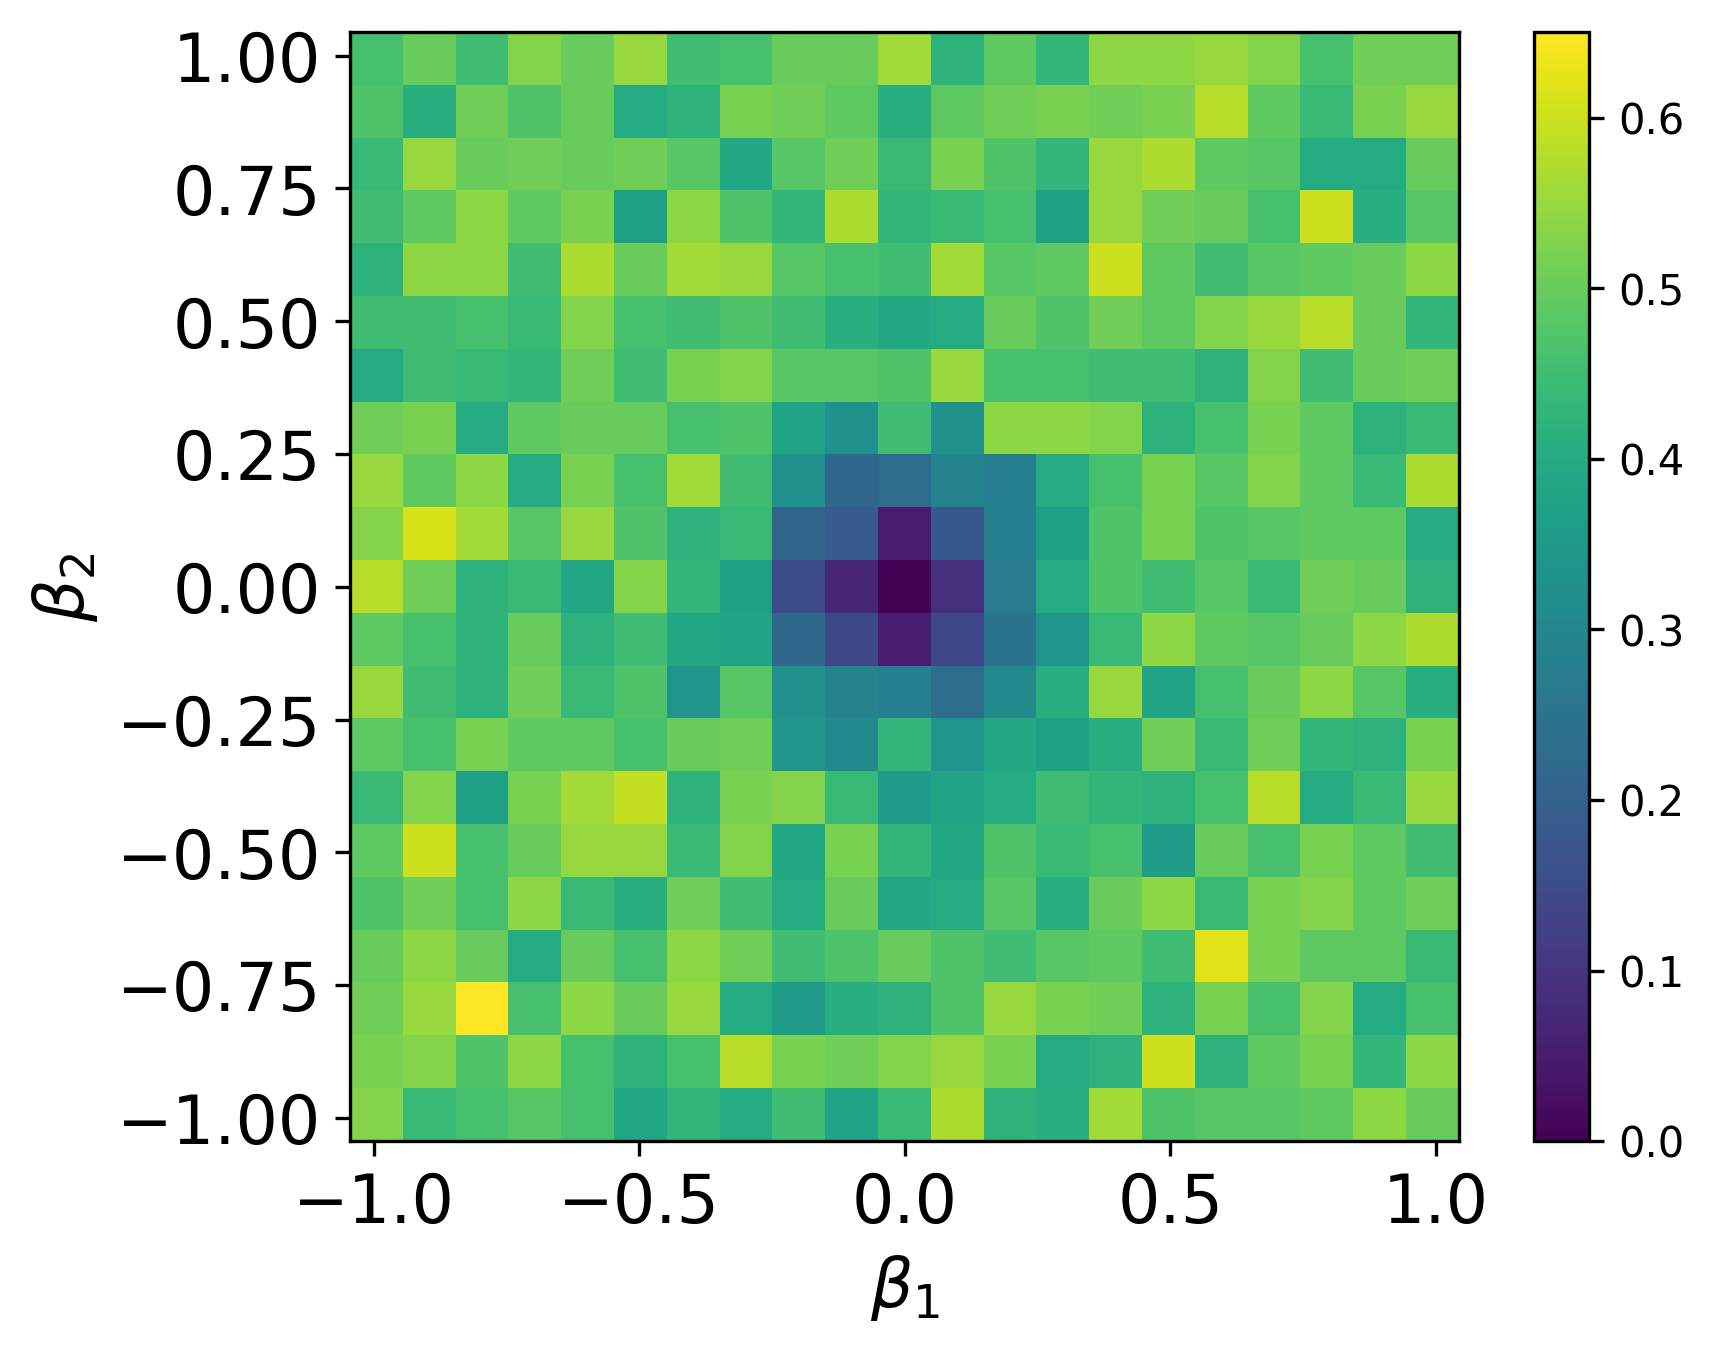

In [33]:
import matplotlib.colors as mcolors
cmap = plt.cm.viridis  # You can choose any colormap
cmap = cmap.copy()     # Copy the colormap to modify it
cmap.set_bad(color='gray')  # Set NaN values to gray

# pmt_count[pmt_count>0.7]=np.nan

plt.figure(dpi=300)

plt.imshow(pmt_count, cmap=cmap, extent=[-beta_range1,beta_range1,-beta_range2,beta_range2], aspect=beta_range1/beta_range2)
plt.xlabel('$\\beta_1$',fontsize=16)
plt.ylabel('$\\beta_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

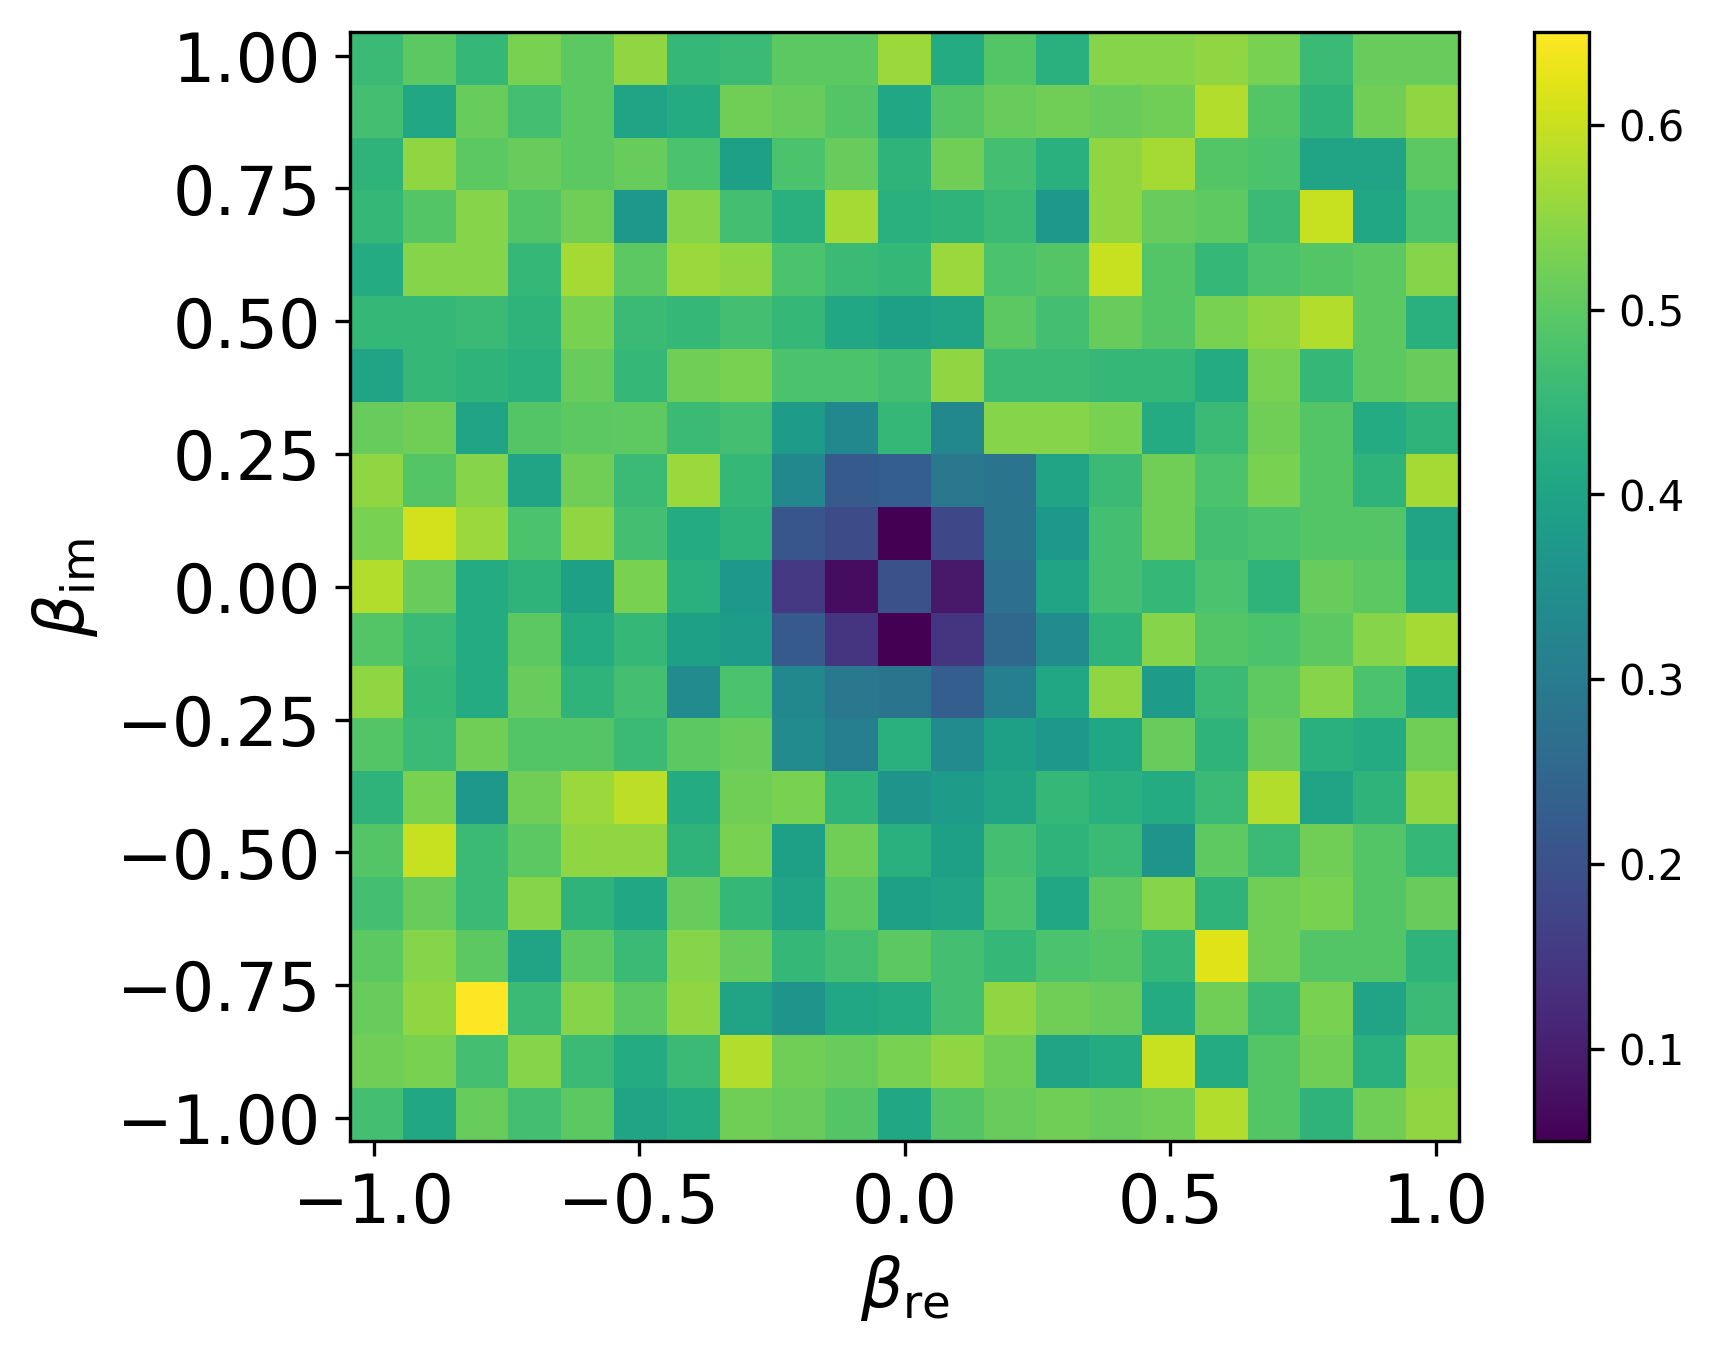

In [34]:
from scipy.ndimage import zoom


def interpolate_2d(data, upscale_factor=2, method='bicubic', padding=0):
    """
    Interpolates a 2D array to a higher resolution grid and then applies optional zero padding.
    
    Parameters:
        data (np.ndarray): 2D input array.
        upscale_factor (int): Factor by which to upscale the resolution.
        method (str): Interpolation method, choices are 'bilinear' or 'bicubic'.
        padding (int): Number of zero-padding layers around the data.
        
    Returns:
        np.ndarray: Interpolated high-resolution 2D array with padding.
    """
    if method == 'bilinear':
        order = 1
    elif method == 'bicubic':
        order = 3
    else:
        raise ValueError("Invalid method. Choose 'bilinear' or 'bicubic'.")
    
    interpolated_data = zoom(data, zoom=upscale_factor, order=order)
    
    if padding > 0:
        interpolated_data = np.pad(interpolated_data, pad_width=padding, mode='constant', constant_values=0.5)
    
    return interpolated_data

pmt_count[-1]=pmt_count[1]
pmt_interpolate=interpolate_2d(pmt_count, upscale_factor=1)
pmt_interpolate[np.where(pmt_interpolate<0.01)]=0.2

plt.figure(dpi=300)
plt.imshow(pmt_interpolate, cmap=cmap, extent=[-beta_range1,beta_range1,-beta_range2,beta_range2], aspect=beta_range1/beta_range2)
plt.xlabel('$\\beta_{\\rm re}$',fontsize=16)
plt.ylabel('$\\beta_{\\rm im}$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

In [35]:
L=len(pmt_interpolate)
offset=(np.sum(pmt_interpolate)-np.sum(pmt_interpolate[L//6:L*5//6, L//6:L*5//6]))/(L*L-(L*5//6-L//6)**2)
print(offset)
offset-=0.007
# offset=0.5

0.48918367346938796


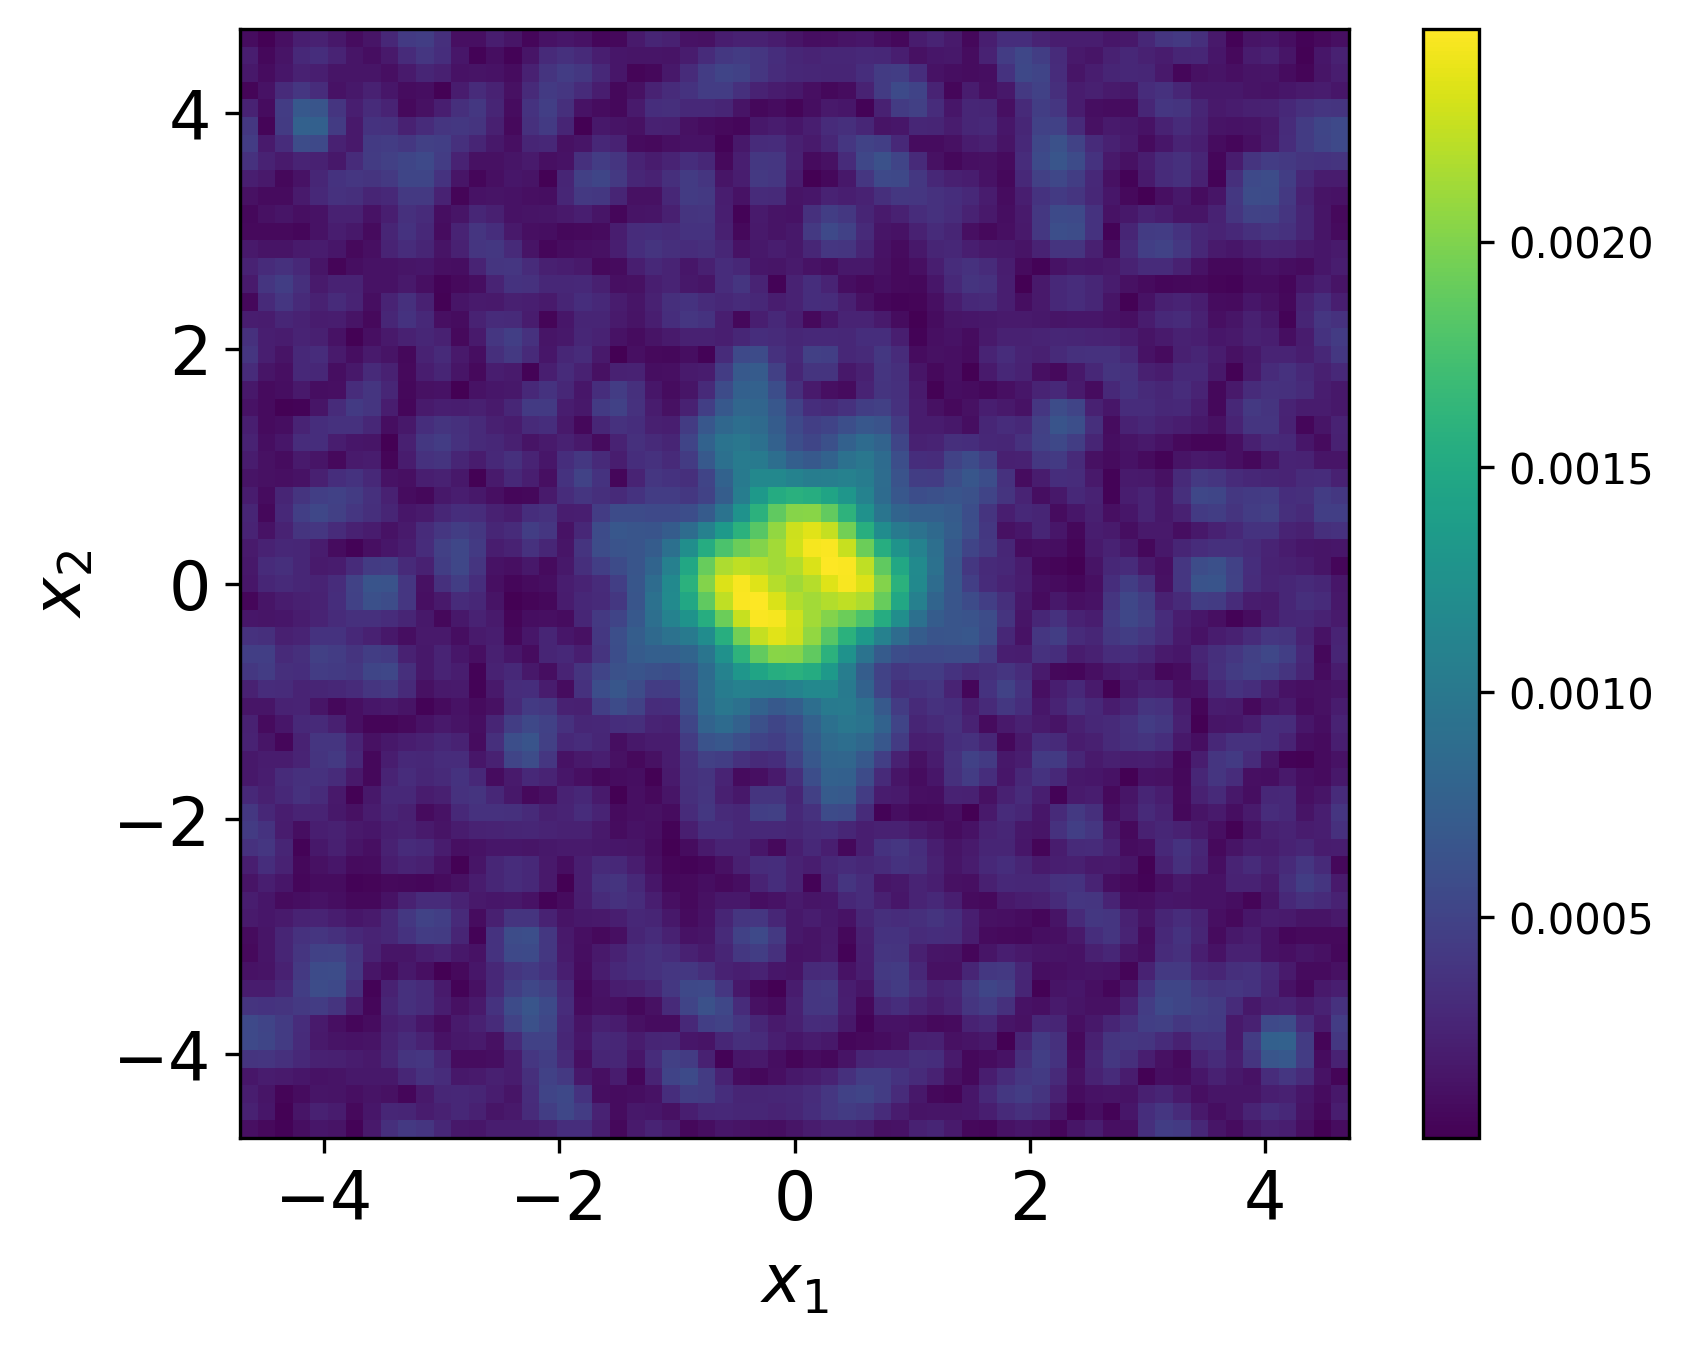

In [36]:
#pmt_count_tmp=pmt_count.copy()
pmt_count_tmp=pmt_interpolate.copy()

pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)

#padding

pmt_padding = np.pad(pmt_count_tmp-offset, pad_width=21, mode='constant', constant_values=0.)

fft_tmp=np.fft.ifft2(pmt_padding)

fft_tmp=np.fft.fftshift(fft_tmp)

alpha_axis1=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range1)/(len(pmt_count)-1)))

alpha_axis2=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range2)/(len(pmt_count)-1)))


fft_interpolate=interpolate_2d(np.abs(fft_tmp), upscale_factor=1)

plt.figure(dpi=300)
plt.imshow(np.abs(fft_interpolate), cmap=cmap,extent=[alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]])

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.xlim(-3,3)
# plt.ylim(-3,3)
plt.colorbar()


In [37]:
wigner=np.abs(fft_interpolate)

wigner/=np.sum(wigner)

#alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]
alpha_avg=0
n_avg=0

alpha_weight=np.zeros(np.shape(wigner))



for i in range(len(alpha_axis1)):
    for j in range(len(alpha_axis2)):
        alpha=np.sqrt(alpha_axis1[i]**2+alpha_axis2[j]**2)

        alpha_avg+=alpha*wigner[i][j]
        n_avg+=alpha**2*wigner[i][j]

        alpha_weight[i][j]=alpha

print(alpha_avg, n_avg)

2.959268596181476 11.64798479255558


1.0


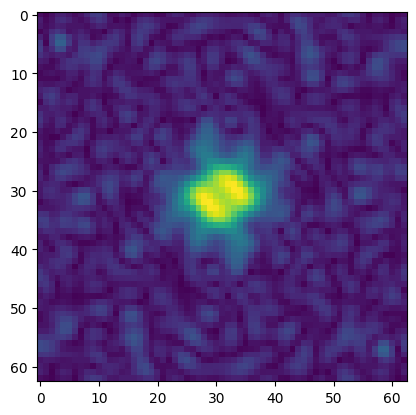

In [38]:
plt.imshow(wigner)
print(np.sum(wigner))

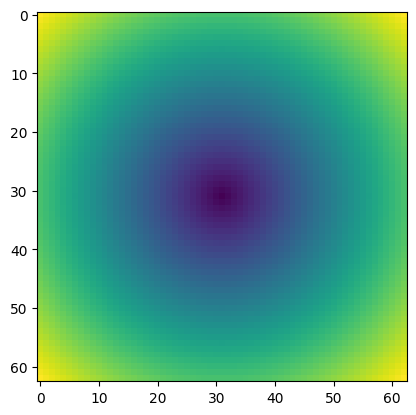

In [39]:
plt.imshow(alpha_weight)

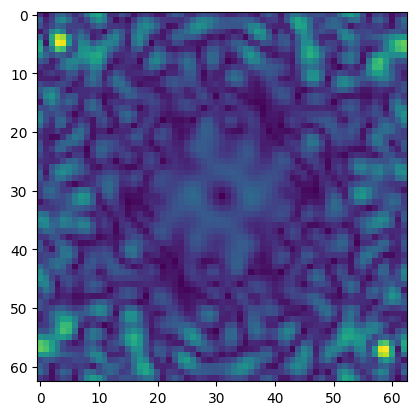

In [40]:
plt.imshow(alpha_weight*wigner)

In [41]:
1.093772593293588  1.3509027734898236  50
1.1040035507517099 1.4089006792138263  30
1.0728995743927332 1.33649806788795    10
0.976478816163924  1.1809068677219823  5
0.9509822716927222 1.1449422269957255  3
0.8314000696388884 1.034141223504179   0

SyntaxError: invalid syntax (2287461199.py, line 1)

Text(0, 0.5, '<$\\alpha$>')

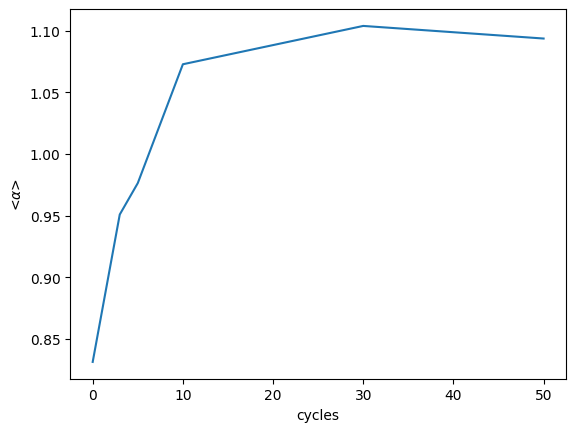

In [ ]:
alpha=[0.8314000696388884, 0.9509822716927222, 0.976478816163924, 1.0728995743927332, 1.1040035507517099, 1.093772593293588]
n=[0, 3,5,10,30,50]
plt.plot(n,alpha)
plt.xlabel('cycles')
plt.ylabel('<$\\alpha$>')